# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Azzam Muhammad Alghozy
- **Email:** azzam.alghozy04@gmail.com
- **ID Dicoding:** azzamma

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Berapa rata-rata penggunaan sepeda per hari atau per musim?

- Pertanyaan 2: Bagaimana pola penggunaan sepeda berdasarkan waktu harian?

## Import Semua Packages/Library yang Digunakan

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import drive

#menghubungkan ke gdrive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Wrangling

### Gathering Data

In [100]:
Day_df = '/content/drive/My Drive/Dicoding/Proyek data Anlys/dataseet/day.csv'
Day_df = pd.read_csv(Day_df)
print(Day_df.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [101]:
Hour_df = '/content/drive/My Drive/Dicoding/Proyek data Anlys/dataseet/hour.csv'
Hour_df = pd.read_csv(Hour_df)
print(Hour_df.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


**Insight:**
- xxx
- xxx

### Assessing Data

#### Menilai tabel Day_df

In [102]:
Day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [103]:
Day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [104]:
print("Jumlah duplikasi: ", Day_df.duplicated().sum())

Jumlah duplikasi:  0


In [105]:
Day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai tabel Hour_df

In [106]:
Hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [107]:
Hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [108]:
print("Jumlah duplikasi: ", Hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [109]:
Hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

#### Membersihkan tabel Day_df

In [110]:
Day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [111]:
Day_df.rename(columns={
    'yr': 'year',
    'mnth': 'month',
    'hum': 'humidity',
    'cnt': 'total_rental',
    'dteday': 'datetime'
}, inplace=True)

In [112]:
Day_df['datetime'] = pd.to_datetime(Day_df['datetime'])

In [113]:
print(Day_df.describe())
print(Day_df.info())

          instant             datetime      season        year       month  \
count  731.000000                  731  731.000000  731.000000  731.000000   
mean   366.000000  2012-01-01 00:00:00    2.496580    0.500684    6.519836   
min      1.000000  2011-01-01 00:00:00    1.000000    0.000000    1.000000   
25%    183.500000  2011-07-02 12:00:00    2.000000    0.000000    4.000000   
50%    366.000000  2012-01-01 00:00:00    3.000000    1.000000    7.000000   
75%    548.500000  2012-07-01 12:00:00    3.000000    1.000000   10.000000   
max    731.000000  2012-12-31 00:00:00    4.000000    1.000000   12.000000   
std    211.165812                  NaN    1.110807    0.500342    3.451913   

          holiday     weekday  workingday  weathersit        temp       atemp  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.028728    2.997264    0.683995    1.395349    0.495385    0.474354   
min      0.000000    0.000000    0.000000    1.000000 

In [114]:
Day_df.duplicated().sum()

0

In [115]:
Day_df.isna().sum()

,0
instant,0
datetime,0
season,0
year,0
month,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [116]:
Day_df.describe()

,instant,datetime,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,total_rental
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [117]:
zero_hum_rows = Day_df[Day_df['humidity'] == 0]
print(f"Jumlah nilai 0 di kolom humidity: {len(zero_hum_rows)}")

Jumlah nilai 0 di kolom humidity: 1


In [118]:
Day_df[Day_df.humidity == Day_df.humidity.min()]

,instant,datetime,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,total_rental
68,69,2011-03-10,1,0,3,0,4,1,3,0.389091,0.385668,0.0,0.261877,46,577,623


In [119]:
median_hum = Day_df['humidity'][Day_df['humidity'] > 0].median()
Day_df['humidity'] = Day_df['humidity'].replace(0, median_hum)

In [120]:
print(Day_df['humidity'].describe())

count    731.000000
mean       0.628752
std        0.140518
min        0.187917
25%        0.521041
50%        0.627083
75%        0.730209
max        0.972500
Name: humidity, dtype: float64


#### Membersihkan tabel Hour_df

In [121]:
Hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [122]:
Hour_df['dteday'] = pd.to_datetime(Hour_df['dteday'])

In [123]:
Hour_df.rename(columns={
    'yr': 'year',
    'mnth': 'month',
    'hum': 'humidity',
    'hr': 'hour',
    'cnt': 'total_rental',
    'dteday': 'datetime'
}, inplace=True)

In [124]:
print(Hour_df.describe())
print(Hour_df.info())

          instant                       datetime        season          year  \
count  17379.0000                          17379  17379.000000  17379.000000   
mean    8690.0000  2012-01-02 04:08:34.552045568      2.501640      0.502561   
min        1.0000            2011-01-01 00:00:00      1.000000      0.000000   
25%     4345.5000            2011-07-04 00:00:00      2.000000      0.000000   
50%     8690.0000            2012-01-02 00:00:00      3.000000      1.000000   
75%    13034.5000            2012-07-02 00:00:00      3.000000      1.000000   
max    17379.0000            2012-12-31 00:00:00      4.000000      1.000000   
std     5017.0295                            NaN      1.106918      0.500008   

              month          hour       holiday       weekday    workingday  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       6.537775     11.546752      0.028770      3.003683      0.682721   
min        1.000000      0.000000      0.0

In [125]:
columns_to_check = ['temp', 'atemp', 'humidity', 'windspeed']
print("Jumlah nilai 0 sebelum penanganan:")
print(Hour_df[columns_to_check].eq(0).sum())

Jumlah nilai 0 sebelum penanganan:
temp            0
atemp           2
humidity       22
windspeed    2180
dtype: int64


In [126]:
for column in columns_to_check:
    mean_value = Hour_df[column].mean()  # Menghitung rata-rata kolom
    Hour_df[column] = Hour_df[column].replace(0, mean_value)  # Mengganti 0 dengan rata-rata

In [127]:
print("Jumlah nilai 0 sebelum penanganan:")
print(Hour_df[columns_to_check].eq(0).sum())

Jumlah nilai 0 sebelum penanganan:
temp         0
atemp        0
humidity     0
windspeed    0
dtype: int64


In [128]:
Hour_df.duplicated().sum()

0

In [129]:
Hour_df.isna().sum()

,0
instant,0
datetime,0
season,0
year,0
month,0
hour,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [130]:
Hour_df.describe()

,instant,datetime,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,total_rental
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475830,0.628023,0.213943,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.015200,0.080000,0.089600,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.134300,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171774,0.191633,0.099324,49.305030,151.357286,181.387599


## Exploratory Data Analysis (EDA)

### Explore Day_df

In [131]:
Day_df.sample(5)

,instant,datetime,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,total_rental
100,101,2011-04-11,2,0,4,0,1,1,2,0.595652,0.565217,0.716956,0.324474,855,2493,3348
256,257,2011-09-14,3,0,9,0,3,1,1,0.673333,0.626900,0.697083,0.167300,647,4138,4785
441,442,2012-03-17,1,1,3,0,6,0,2,0.514167,0.505046,0.755833,0.110704,3155,4681,7836
691,692,2012-11-22,4,1,11,1,4,0,1,0.340000,0.350371,0.580417,0.052871,955,1470,2425
614,615,2012-09-06,3,1,9,0,4,1,2,0.696667,0.655329,0.810417,0.142421,611,5592,6203


In [132]:
Day_df.describe(include="all")

,instant,datetime,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,total_rental
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.628752,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.187917,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.521041,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.627083,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.140518,0.077498,686.622488,1560.256377,1937.211452


In [133]:
Day_df.instant.is_unique

True

In [134]:
Day_df.instant.duplicated

<bound method Series.duplicated of 0        1
1        2
2        3
3        4
4        5
      ... 
726    727
727    728
728    729
729    730
730    731
Name: instant, Length: 731, dtype: int64>

In [135]:
Day_df.groupby(by="weekday").agg({
    "instant": "nunique",
    "weekday": ["max", "min", "mean", "std", ]
})

instant weekday              
        nunique     max min mean  std
weekday                              
0           105       0   0  0.0  0.0
1           105       1   1  1.0  0.0
2           104       2   2  2.0  0.0
3           104       3   3  3.0  0.0
4           104       4   4  4.0  0.0
5           104       5   5  5.0  0.0
6           105       6   6  6.0  0.0

In [136]:
Day_df.groupby(by="workingday").agg({
    "instant": "nunique",
    "workingday": ["max", "min", "mean", "std", ]
})

instant workingday              
           nunique        max min mean  std
workingday                                 
0              231          0   0  0.0  0.0
1              500          1   1  1.0  0.0

In [137]:
Day_df.groupby(by="registered").instant.nunique().sort_values(ascending=False)

,instant
registered,
6248,3
1707,3
4841,3
3248,2
3413,2
...,...
3077,1
3084,1
3100,1


In [138]:
Day_df.groupby(by="total_rental").instant.nunique().sort_values(ascending=False)

,instant
total_rental,
4401,2
4459,2
5260,2
4073,2
5698,2
...,...
3761,1
3767,1
3777,1


<Axes: >

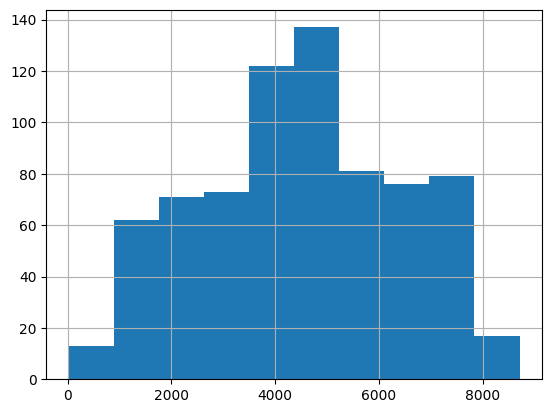

In [139]:
Day_df.total_rental.hist()

### Explore Hour_df

In [140]:
Hour_df.sample(5)

,instant,datetime,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,total_rental
4623,4624,2011-07-16,3,0,7,13,0,6,0,1,0.76,0.6818,0.45,0.298500,221,276,497
16900,16901,2012-12-11,4,1,12,23,0,2,1,1,0.30,0.2879,0.52,0.223900,4,60,64
9322,9323,2012-01-29,1,1,1,8,0,0,0,1,0.18,0.1970,0.40,0.134300,9,61,70
11380,11381,2012-04-24,2,1,4,9,0,2,1,1,0.40,0.4091,0.47,0.358200,6,302,308
5586,5587,2011-08-25,3,0,8,16,0,4,1,1,0.72,0.7121,0.84,0.190098,16,105,121


In [141]:
Hour_df.describe(include="all")

,instant,datetime,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,total_rental
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475830,0.628023,0.213943,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.015200,0.080000,0.089600,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.134300,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171774,0.191633,0.099324,49.305030,151.357286,181.387599


In [142]:
Hour_df.instant.is_unique

True

In [143]:
Hour_df.groupby(by="hour").agg({
    "instant": "nunique",
    "hour": ["max", "min", "mean", "std", ]
})

instant hour               
     nunique  max min  mean  std
hour                            
0        726    0   0   0.0  0.0
1        724    1   1   1.0  0.0
2        715    2   2   2.0  0.0
3        697    3   3   3.0  0.0
4        697    4   4   4.0  0.0
5        717    5   5   5.0  0.0
6        725    6   6   6.0  0.0
7        727    7   7   7.0  0.0
8        727    8   8   8.0  0.0
9        727    9   9   9.0  0.0
10       727   10  10  10.0  0.0
11       727   11  11  11.0  0.0
12       728   12  12  12.0  0.0
13       729   13  13  13.0  0.0
14       729   14  14  14.0  0.0
15       729   15  15  15.0  0.0
16       730   16  16  16.0  0.0
17       730   17  17  17.0  0.0
18       728   18  18  18.0  0.0
19       728   19  19  19.0  0.0
20       728   20  20  20.0  0.0
21       728   21  21  21.0  0.0
22       728   22  22  22.0  0.0
23       728   23  23  23.0  0.0

<Axes: >

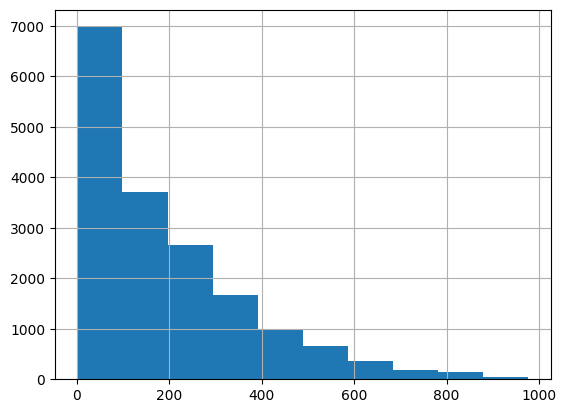

In [144]:
Hour_df.total_rental.hist()

### Day_df & Hour_df

In [145]:
all_df = pd.merge(
    left=Day_df,
    right=Hour_df,
    how="left",
    left_on="instant",
    right_on="instant"
)
all_df.head()

,instant,datetime_x,season_x,year_x,month_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,humidity_y,windspeed_y,casual_y,registered_y,total_rental_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.190098,3,13,16
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,6,0,1,0.22,0.2727,0.80,0.190098,8,32,40
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,6,0,1,0.22,0.2727,0.80,0.190098,5,27,32
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,...,6,0,1,0.24,0.2879,0.75,0.190098,3,10,13
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,...,6,0,1,0.24,0.2879,0.75,0.190098,0,1,1


In [146]:
all_df.groupby(by=["datetime_x", "datetime_y"]).agg({
    "registered_x": "sum",
    "total_rental_x": "sum",
    "registered_y": "sum",
    "total_rental_y": "sum"
})


,,registered_x,total_rental_x,registered_y,total_rental_y
datetime_x,datetime_y,,,,
2011-01-01,2011-01-01,654,985,13,16
2011-01-02,2011-01-01,670,801,32,40
2011-01-03,2011-01-01,1229,1349,27,32
2011-01-04,2011-01-01,1454,1562,10,13
2011-01-05,2011-01-01,1518,1600,1,1
...,...,...,...,...,...
2012-12-27,2011-02-02,1867,2114,66,76
2012-12-28,2011-02-02,2451,3095,95,103
2012-12-29,2011-02-02,1182,1341,183,190


In [147]:
merged_file_path = '/content/drive/My Drive/Dicoding/Proyek data Anlys/dataseet/merged_day_hour.csv'
all_df.to_csv(merged_file_path, index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa rata-rata penggunaan sepeda per hari atau per musim?

In [148]:
average_daily_total_rental = all_df.groupby('datetime_x')['total_rental_x'].mean()
print(average_daily_total_rental.head())

datetime_x
2011-01-01     985.0
2011-01-02     801.0
2011-01-03    1349.0
2011-01-04    1562.0
2011-01-05    1600.0
Name: total_rental_x, dtype: float64


In [149]:
average_daily_total_rental = all_df.groupby('datetime_y')['total_rental_y'].mean()
print(average_daily_total_rental.head())

datetime_y
2011-01-01    41.041667
2011-01-02    34.826087
2011-01-03    61.318182
2011-01-04    67.913043
2011-01-05    69.565217
Name: total_rental_y, dtype: float64


In [150]:
print(daily_avg.columns)

Index(['datetime_y', 'total_rental_y'], dtype='object')


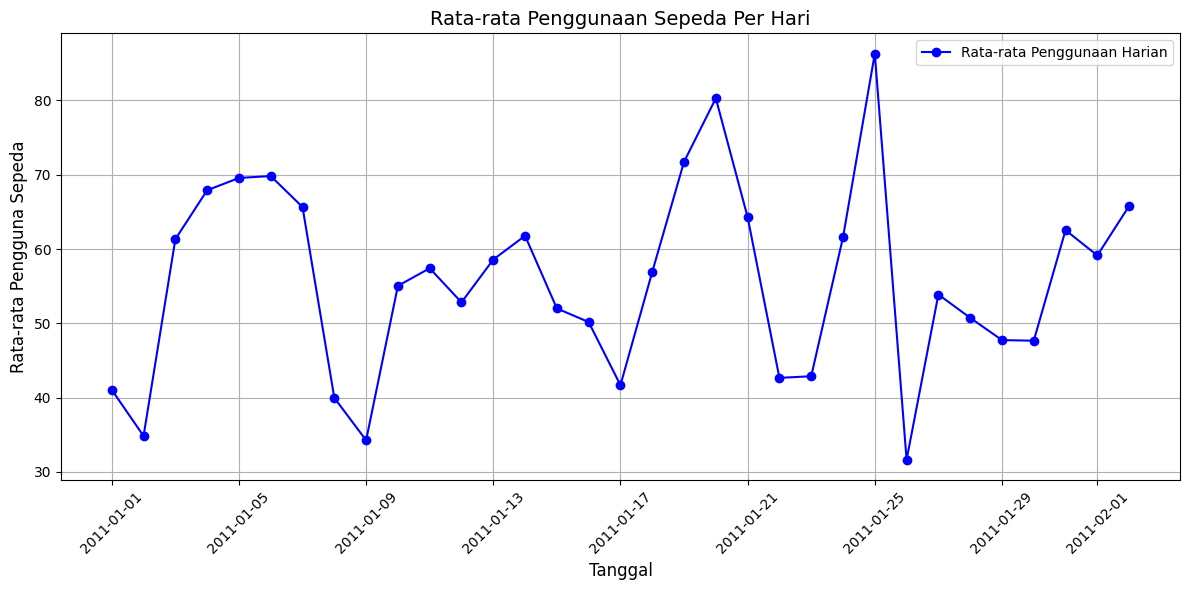

In [151]:
daily_avg = average_daily_total_rental.reset_index()

plt.figure(figsize=(12, 6))
plt.plot(daily_avg['datetime_y'], daily_avg['total_rental_y'], marker='o', color='b', label='Rata-rata Penggunaan Harian')
plt.title('Rata-rata Penggunaan Sepeda Per Hari', fontsize=14)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Rata-rata Pengguna Sepeda', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [152]:
season_avg = all_df.groupby('season_x')['total_rental_x'].mean()
print(season_avg)

season_x
1    2604.132597
2    4992.331522
3    5644.303191
4    4728.162921
Name: total_rental_x, dtype: float64


In [153]:
season_avg = all_df.groupby('season_y')['total_rental_y'].mean()
print(season_avg)

season_y
1    55.902873
Name: total_rental_y, dtype: float64


<ipython-input-154-3cdfede615be>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_avg, x='season_x', y='total_rental_x', palette='coolwarm')  # Update x and y accordingly


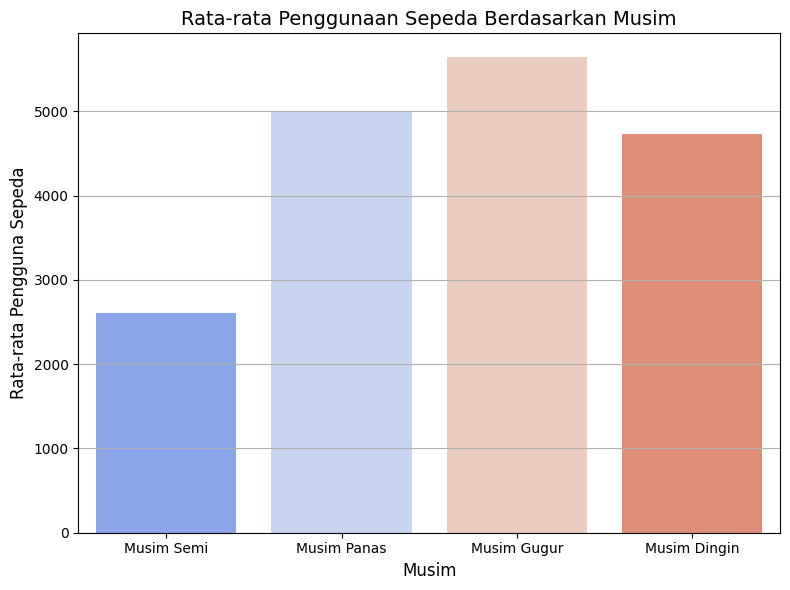

In [154]:
season_avg = all_df.groupby('season_x')['total_rental_x'].mean().reset_index()  # Use season_x and total_rental_x from Day_df

plt.figure(figsize=(8, 6))
sns.barplot(data=season_avg, x='season_x', y='total_rental_x', palette='coolwarm')  # Update x and y accordingly
plt.title('Rata-rata Penggunaan Sepeda Berdasarkan Musim', fontsize=14)
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Rata-rata Pengguna Sepeda', fontsize=12)
plt.xticks([0, 1, 2, 3], ['Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Dingin'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Pertanyaan 2: Bagaimana pola penggunaan sepeda berdasarkan waktu harian?

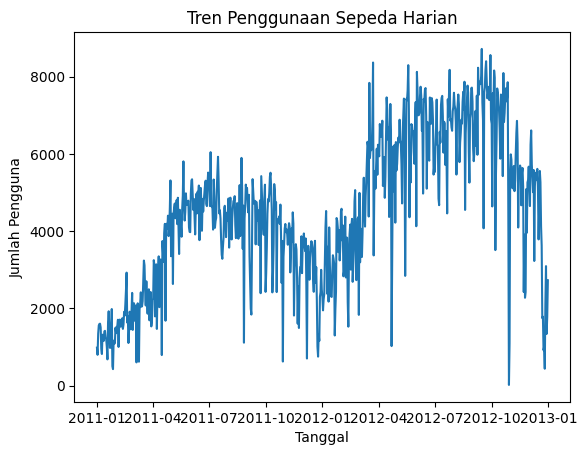

In [155]:
daily_cnt = all_df.groupby('datetime_x')['total_rental_x'].sum().reset_index()
plt.plot(daily_cnt['datetime_x'], daily_cnt['total_rental_x'])
plt.title('Tren Penggunaan Sepeda Harian')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Pengguna')
plt.show()

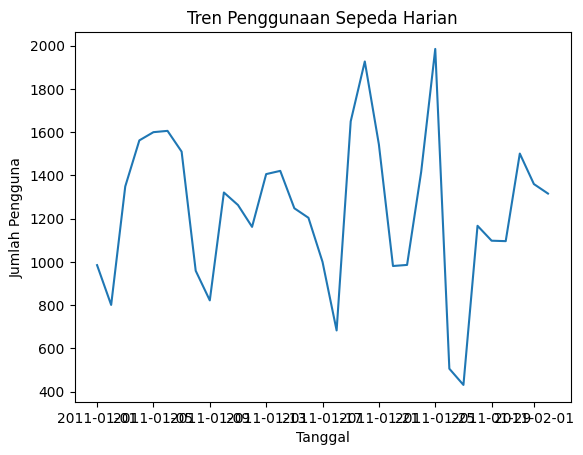

In [156]:
daily_cnt = all_df.groupby('datetime_y')['total_rental_y'].sum().reset_index()
plt.plot(daily_cnt['datetime_y'], daily_cnt['total_rental_y'])
plt.title('Tren Penggunaan Sepeda Harian')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Pengguna')
plt.show()

## Conclusion

A. Conclution pertanyaan 1:
1. berdasarkan hari
- Penggunaan sepeda harian terlihat sangat bervariasi dari waktu ke waktu.
- Ada beberapa puncak penggunaan yang signifikan, seperti di sekitar tanggal 4 Januari, 25 Januari, dan 1 Februari.
- Sebaliknya, ada penurunan tajam pada beberapa hari, seperti sekitar tanggal 9 Januari dan 26 Januari.

2. berdasarkan musim
- Musim Semi memiliki rata-rata penggunaan sepeda terendah dibandingkan musim lainnya. Hal ini mungkin disebabkan oleh cuaca yang masih dingin di awal musim atau kondisi yang kurang mendukung.
- Musim Panas dan Musim Gugur menunjukkan rata-rata penggunaan sepeda yang lebih tinggi. Hal ini bisa dihubungkan dengan cuaca yang lebih baik, memungkinkan lebih banyak orang untuk bersepeda.
- Musim Gugur memiliki rata-rata penggunaan sepeda tertinggi, sedikit lebih tinggi dari Musim Panas. Ini mungkin menunjukkan preferensi pengguna sepeda terhadap suhu yang lebih sejuk di Musim Gugur.
- Musim Dingin masih menunjukkan penggunaan sepeda yang signifikan, meskipun lebih rendah dari Musim Panas dan Gugur. Penggunaan ini menunjukkan bahwa sebagian orang tetap menggunakan sepeda meskipun dalam kondisi cuaca yang lebih dingin.

B. Conclution pertanyaan 2
- Jumlah pengguna sepeda cenderung meningkat secara signifikan pada awal periode hingga mencapai puncaknya.
- Setelah mencapai puncak, jumlah pengguna mulai menurun secara bertahap menjelang akhir periode.
- Terdapat fluktuasi penggunaan sepeda dalam jangka pendek, yang mungkin dipengaruhi oleh faktor musiman, cuaca, atau hari tertentu